In [11]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [12]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [13]:
# Normalization function ##
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())  
    return (x)

In [17]:
# Normalization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(Univ.iloc[:,1:])
normalized_data[:3]

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667]])

In [19]:
pd.DataFrame(normalized_data).head() ##

,0,1,2,3,4,5
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [42]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


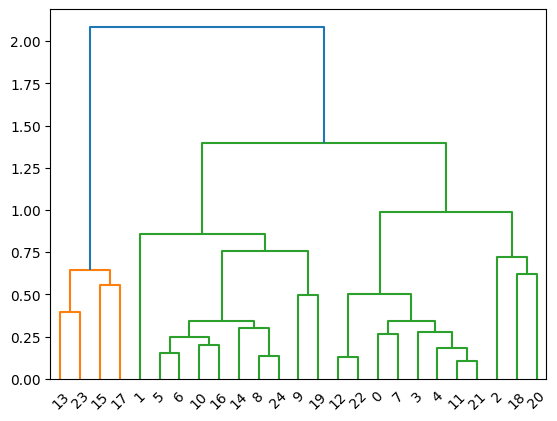

In [25]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [27]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [28]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.value_counts()

Clusters
0           10
3            8
1            4
2            3
Name: count, dtype: int64

In [34]:
y_hc

array([3, 0, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0], dtype=int64)

In [35]:
df_norm['h_clusterid'] = hc.labels_

In [40]:
df_norm['h_clusterid'].value_counts()

h_clusterid
0    10
3     8
1     4
2     3
Name: count, dtype: int64

In [41]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,3
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,2
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,3
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,3
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,3
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


# K-means

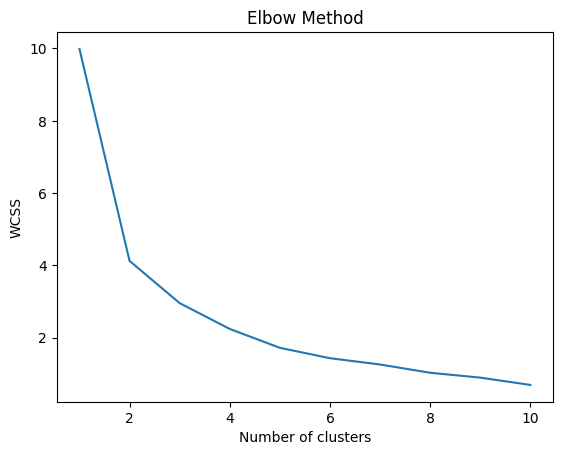

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [45]:
clusters_new.labels_

array([1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1,
       2, 0, 1])

In [53]:
Univ['kmeans']=clusters_new.labels_
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,kmeans
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [54]:
Univ['kmeans'].value_counts()

kmeans
1    15
2     4
0     4
3     2
Name: count, dtype: int64

In [56]:
Univ[Univ['kmeans']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,kmeans
1,CalTech,1415,100,25,6,63575,81,3
9,JohnsHopkins,1305,75,44,7,58691,87,3
